In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [9]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target


print('X_data: ', data.images.shape) #아깐 24였는데 8이면 size 매우 작네
print('y_data: ', y_data.shape)
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
# 3차원 ->4차원
y_data = to_categorical(y_data)    #to one-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)
#70%는 학습 set, 30%sms 검증 set
#random_state:seed같은 것

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_data:  (1797, 8, 8)
y_data:  (1797,)
X_train:  (1257, 8, 8, 1)
X_test:  (540, 8, 8, 1)
y_train:  (1257, 10)
y_test:  (540, 10)


In [3]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), # (8,8,1) 1은 gray라서. color면 3임
                 filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))    #CNN의 특징: pooling 단계를 거침. 크기가 반으로 줄어듦.


model.add(Flatten())

model.add(Dense(50, activation = 'relu'))        #hidden layer 하나 추가
model.add(Dense(10, activation = 'softmax'))     #마지막 층은 출력층.

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

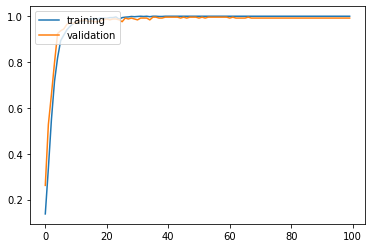

540/540 [==============================] - 0s 65us/step
Test accuracy:  0.9814814925193787


In [4]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

#단순 cnn조차 금방 96% 나온다.

In [10]:
# 깊은 네트워크 구축함.
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))    #pooling 없으니 안 줄어
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    #padding = 'same' 있어서 영상 크기가 안 줄어듦
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))    #pooling 있으니 반 줄어
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Flatten())    
    model.add(Dense(50, activation = 'relu'))    
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [11]:
model = deep_cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
activation_4 (Activation)    (None, 4, 4, 50)         

학습해야 할 파라미터가 11만개. 쉽지 않은 문제임. 이 weight를 다 결정해야 해.  
sample은 1000여 개.(굉장히 작음)  

학습 파라미터 갯수 계산  
필터수 * 커널사이즈 + 필터수(각 필터마다 bias)  

dense_3에서 dense_4로 갈 때 학습 파라미터 수?  
입력층 50 * 출력층 10 + 출력층 10 = 510  

샘플갯수 모르니까 첫번째는 다 none으로 나와 (다 똑같아)

In [12]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 40.8 s


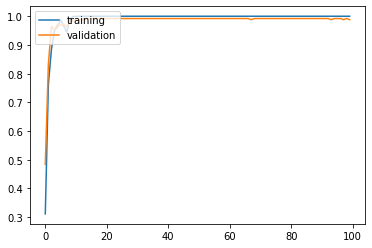

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [14]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])    # 오히려 결과가 떨어짐

540/540 [==============================] - 0s 172us/step
Test accuracy:  0.9814814925193787


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [15]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [16]:
model = deep_cnn_advanced()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)         

In [17]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 1min 20s


In [18]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])             
#오히려 성능이 좀 떨어짐. 깊게 잡았을 때 대부분 성능이 떨어질 확률이 커

540/540 [==============================] - 0s 235us/step
Test accuracy:  0.9814814925193787
